Big City Crime Analysis

by: Cameron Sudderth, Ayana Rodgers, Moni Buddha

https://github.com/aya-rodgers97/Crime-Project-Tools-1


2024 is a Presidential Election year and crime is always a major topic with which Americans vote, both on a Federal and Local level​

Every major US city publishes data related to its crimes, so we wanted to look at the major metro areas in the US to see what similarities exist

API Connections​:

NYC Crime Data​
City of LA Crime Data​
City of Chicago Crime Data​

Categorize the Crime Descriptions into commonly  themed categories​

Identify the most significant crimes in each city​

Identify the most affected gender in each city.​

To find patterns in each season, day of the week and hour of the day in each city.

For research, there were many articles on the analysis of crime throughout different cities. One article we used is Los Angeles Neighborhood Analysis by Chaitany Krishna Kasaraneni on Towards Data Science. In this article they used crime to try and select the best locations in Los Angeles to possibly live or open a business. In this article, data was collected through data scraping for the Latitude and Longitude of crime in the city. Also, a dataset of Los Angeles neighborhoods was used to determine safest areas. Through this article we got the idea to map our crimes and try to determine criminal hot spots in each of our cities. 

Additionally, there is a book Crime Analysis with Crime Mapping by Rachel Boba Santos. Mainly, looking at the summary this is an entire book based on Crime Analysis with foundation, process,
data, different ways that crime can be analyzed. Crime analysis is used to support major funtions within police agencies. Such as analyzing calls for service, quality of life issues, traffic craches. With such analyzes agencies can determine where there should be more police presence, those with greater incidents. Through our project we seek to perform such analysis to determine the higher rates of crime in areas of the cities, time of day, season, etc. 


In [1]:
import requests
import pandas as pd

NYC API Connection

In [2]:
import pandas as pd
from sodapy import Socrata

# Number of Records limit
nyc_limit = 500
la_limit = 500
chi_limit = 500

# Connect to NYC API
NYCAppToken = '3u5hcZ6WwKere5Mb5nm5S9mT2'
nyc_client = Socrata("data.cityofnewyork.us",
                 NYCAppToken,
                 username="Cameron.Suddreth@du.edu",
                 password="COMP4447groupproject")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
nyc_results = nyc_client.get("5uac-w243", limit=nyc_limit)

# Convert to pandas DataFrame
nyc_df = pd.DataFrame.from_records(nyc_results)


LA API Connection

In [3]:

# Example authenticated client (needed for non-public datasets):
LA_AppToken = 'mEU8HkgWCvfkWLHKGxfiUFecc'
la_client = Socrata("data.lacity.org",
                 LA_AppToken,
                 username="Cameron.Suddreth@du.edu",
                 password="COMP4447groupproject")


la_results = la_client.get("2nrs-mtv8", limit=la_limit)

# Convert to pandas DataFrame
la_df = pd.DataFrame.from_records(la_results)

Chicago API Connection

In [4]:
CHI_AppToken = '6rxQVr5BfXAbUUccKTodxYVdj'
chi_client = Socrata("data.cityofchicago.org",
                    CHI_AppToken,
                    username="Cameron.Suddreth@du.edu",
                    password="COMP4447groupproject")
chi_results = chi_client.get("9hwr-2zxp", limit=chi_limit)
chi_df = pd.DataFrame.from_records(chi_results)

Above, we have established three different API connections. We have established an API connection with each of the three largest cities in the United States: New York, NY; Los Angeles, CA; and Chicago, IL. We are also able to change the number of records that we are pulling in for analysis as each of the databases combined would result in close to one million records!

With each connection, we have created a separate dataframe which allowed us to easily pull in all the records from each city's database. As we now have each of the cities with their own dataframe, we will begin to merge the dataframes together to allow us to look at the data amongst the cities together.

The below cell compares the number of columns within each dataframe. This was the initial step for us to begin merging the dataset together.

In [5]:
nyc_columns = nyc_df.columns
la_columns = la_df.columns
chi_columns = chi_df.columns

print(f'Number of NYC Columns: {len(nyc_columns)}')
print(f'Number of LA Columns: {len(la_columns)}')
print(f'Number of CHI Columns: {len(chi_columns)}')

Number of NYC Columns: 40
Number of LA Columns: 26
Number of CHI Columns: 22


We reviewed the column names within the API documentation and determined what information we wanted from each city and then reduced the size of each dataframe to contain only those columns which we wanted to analyze. We then renamed each column so to allow for easier analysis and merging.

Before we create the new column headers, we must also resolve any NAN values else we will receive an error. We have imported the Numpy module to fill in the Weapon user for each NYC and Chicago; the time of the crime in Chicago; and the victim sex for Chicago as this data was unavailable in each respective city's database.

We have also created a new column in each city's original dataframe to help identify which city each record belongs to after we have merged the data.

In [6]:
import numpy as np

nyc_df['Weapon'] = np.nan
chi_df['Weapon'] = np.nan
chi_df['Time'] = np.nan
chi_df['Victim Sex'] = np.nan
nyc_df['City'] = 'NYC'
la_df['City'] = "LA"
chi_df['City'] = 'CHI'

la_df = la_df[['dr_no', 'date_rptd', 'date_occ', 'crm_cd', 'crm_cd_desc', 
'weapon_desc', 'vict_sex', 'lat', 'lon', 'City']]
nyc_df = nyc_df[['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm','ky_cd', 'ofns_desc', 
'Weapon', 'vic_sex', 'latitude','longitude', 'City']]
chi_df = chi_df[['id', 'date','Time', 'iucr','description','Weapon', 
'Victim Sex','latitude','longitude', 'City']]
generic_columns = ['Case Number', 'Date', 'Time', 'Crime Code', 'Crime Description','Weapon', 
'Victim Sex', 'Latitude', 'Longitude', 'City']

# Rename the columns
la_df.columns = generic_columns
nyc_df.columns = generic_columns
chi_df.columns = generic_columns

By renaming the columns of the dataframe above, it simplified the merging process, so we did not have to specify what column in each dataframe to merge based on.

In [7]:
combined_df = pd.concat([la_df, nyc_df, chi_df],ignore_index=True)
print(len(combined_df))


1500


In [8]:
combined_df['Crime Description'].sample(25)

1261                              DOMESTIC BATTERY SIMPLE
352     CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...
1210                           RECKLESS FIREARM DISCHARGE
420                                     THEFT OF IDENTITY
283                                        RAPE, FORCIBLE
1423                                       $500 AND UNDER
1035                           RECKLESS FIREARM DISCHARGE
439                                     THEFT OF IDENTITY
31                                      THEFT OF IDENTITY
1345                                            OVER $500
1118                                          TO PROPERTY
1209                                               SIMPLE
196                     INTIMATE PARTNER - SIMPLE ASSAULT
659                                         PETIT LARCENY
864                                         PETIT LARCENY
425              SHOPLIFTING - PETTY THEFT ($950 & UNDER)
900                          ASSAULT 3 & RELATED OFFENSES
26            

In [9]:
combined_df['str_length'] = combined_df['Crime Description'].str.len()
number_of_crimes = combined_df['Crime Description'].value_counts()
list_of_crimes = combined_df['Crime Description'].unique().tolist()
list_of_crimes_lower = [crime.lower() for crime in list_of_crimes]

print(len(list_of_crimes))

152


In [10]:
# !pip install transformers
# !pip3 install torch torchvision

Simplify the Descriptions

In [11]:
# !pip install spacy

In [12]:
combined_df[['Crime Description', 'City']].sample(20)

,Crime Description,City
1180,AUTOMOBILE,CHI
502,FELONY ASSAULT,NYC
547,PETIT LARCENY,NYC
306,BURGLARY,LA
352,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,LA
1316,FROM BUILDING,CHI
196,INTIMATE PARTNER - SIMPLE ASSAULT,LA
1367,CREDIT CARD FRAUD,CHI
230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",LA
205,CHILD ANNOYING (17YRS & UNDER),LA


As shown in the sample dataframe above, it is clear that there are many different crime descriptions and not a lot of similarity amongst all of the cities. Our goal is to reduce the number of descriptions and classify them under a particular "topic", which will allow voters and policy makers to more easily see what crimes are occurring and where.

To do this, we have developed a Latent Dirichlet Allocation (LDA) model. Before we can do this, we need to clean or "preprocess" the data coming out of the crime description column of the dataframe. To do this, we have created functions that will remove any numbers and punctuation from the text descriptions. We also lemmatized each description to reduce the descriptions down to their root word. We thought this would benefit us by classifying: "assaulted" and "assault"; and "hijacking" and "hijack" to the same word thereby reducing the number of unique descriptions/classifications.

In [13]:
import sys
import re
try:
    # Try to import the SpaCy model to check if it's installed
    import en_core_web_sm
except ImportError:
    # If the model is not installed, download it.
    print("Downloading the 'en_core_web_sm' model...")
    !python3.7 -m spacy download en_core_web_sm

import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    text = re.sub(r'[\d]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.lower()

def lemmatize(text):
    doc = nlp(text)
    # Return lemmatized text, only including tokens that are alphabetic
    return " ".join([token.lemma_ for token in doc if token.is_alpha])

# Pre-process the text to remove digits and punctuation
combined_df['Preprocessed Text'] = combined_df['Crime Description'].apply(preprocess_text)

# Apply lemmatization
combined_df['Lemmatized Text'] = combined_df['Preprocessed Text'].apply(lemmatize)

print(combined_df[['Lemmatized Text']].head())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


               Lemmatized Text
0                vehicle steal
1        burglary from vehicle
2                   bike steal
3  shopliftinggrand theft over
4            theft of identity


The below is the creation of our LDA model. We built it as a function which would allow us to easily run multiple iterations of the model, and select the best model. The below code returns the best model based on the lowest perplexity.

Looking at the below sample of original crime descriptions compared to the dominant topic word that is being assigned, you can see that some of them do not necessarily make sense. An area where this can be improved for future use is by continuing to run the model and adding descriptive words that do not make sense to the stop words list. Another important observation is that the topics holistically appear to be getting closer to characterizing each crime description; however, the "dominant topic word" is the first word within the list of the top 3 words for each topic, which is not necessarily correctly describing the original crime description.

Looking at an article on Towards Data Science, it was seen that perplexity is a good measure of how accurate the model is working. The lower the perplexity, the better the ability to predict the next word. Perplexity of around 37 is the lowest value that we have gotten and spot checking the records appears to be getting closer to accurately selecting a new crime description.

Source: https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

In [14]:
import sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pandas as pd 

def run_lda(n_topics, max_df, min_df, combined_df, top_topicwords):

    custom_stop_words = ["ord", "yrs", "pub", "unlawful", "petty", "lewd", "grand", "chld", "forcible", "relate",
     "susp", "agnst", "felony", "miscellaneous", "mischief", "criminal", "crm", "bunco", "old", "law", "letter", "telephone", "overexcptgunsfowllivestkprod"]
    stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop_words))
    cv = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=stop_words, lowercase=True)
    cv.fit(combined_df['Lemmatized Text'])
    dtm = cv.transform(combined_df['Lemmatized Text'])
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)

    top_words_per_topic = []
    for index, topic in enumerate(lda.components_):
        # note may need to change to cv.get_feature_names() for older versions of sklearn
        top_words = [cv.get_feature_names_out()[i] for i in topic.argsort()[-top_topicwords:]]
        top_words_per_topic.append(top_words)
        # print(f'Top {top_topicwords} words for topic {index}: {top_words}')
    
    # Transform the DTM to get the topic results
    topic_results = lda.transform(dtm)

    # Return the perplexity and top words for each topic
    return lda.perplexity(dtm), top_words_per_topic, topic_results

# Initialize variables to keep track of the best model
lowest_perplexity = float('inf')
best_model_config = None
best_top_words = None
best_topic_results = None

# Parameters to iterate over
n_topics_options = [5, 7, 10]
max_df_options = [0.7, 0.75, 0.8, 0.85]
min_df_options = [2, 5]
best_num_top_words = 3

for n_topics in n_topics_options:
    for max_df in max_df_options:
        for min_df in min_df_options:
            perplexity, top_words, topic_results = run_lda(n_topics, max_df, min_df, combined_df, best_num_top_words)
            if perplexity < lowest_perplexity:
                lowest_perplexity = perplexity
                best_model_config = (n_topics, max_df, min_df)
                best_top_words = top_words
                best_topic_results = topic_results

# Use the best model to append the dominant topic's top word to each document in the DataFrame
dominant_topics = best_topic_results.argmax(axis=1)
combined_df['Dominant Topic Word'] = [best_top_words[topic][0] for topic in dominant_topics]  # Using the first top word as representative
print(best_top_words)
print(f'Best Model Configuration: {best_model_config} with Lowest Perplexity: {lowest_perplexity}')

[['domestic', 'battery', 'simple'], ['property', 'petit', 'larceny'], ['retail', 'identity', 'theft'], ['plain', 'build', 'theft'], ['automobile', 'assault', 'harrassment'], ['aggravate', 'vehicle', 'traffic'], ['intimate', 'partner', 'sensblty'], ['entry', 'crime', 'burglary'], ['steal', 'motor', 'vehicle'], ['fraud', 'possession', 'handgun']]
Best Model Configuration: (10, 0.7, 5) with Lowest Perplexity: 36.79963064955662


In [15]:
print(combined_df[['Crime Description', 'Dominant Topic Word']].sample(10))
print(combined_df['Dominant Topic Word'].unique())


                                    Crime Description Dominant Topic Word
1082                           UNLAWFUL USE - HANDGUN               fraud
1450                                      TO PROPERTY            property
450                                 THEFT OF IDENTITY              retail
281                                 THEFT OF IDENTITY              retail
152                 INTIMATE PARTNER - SIMPLE ASSAULT            intimate
480           LETTERS, LEWD  -  TELEPHONE CALLS, LEWD            domestic
648                                     HARRASSMENT 2          automobile
1008                    UNLAWFUL POSSESSION - HANDGUN               fraud
100   THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)               steal
1147                    UNLAWFUL POSSESSION - HANDGUN               fraud
['steal' 'retail' 'domestic' 'entry' 'fraud' 'automobile' 'property'
 'plain' 'intimate' 'aggravate']


Graphing the crimes and their cities

In [16]:
import folium
from folium import plugins

With this first graph you can see when we mass graph all of the crimes in their respective cities it's difficult to interperet which are the hot crime areas or not. It'll be better to interpret if we grouped the points in their areas. 

In [17]:
df = combined_df 
 
# Convert Latitude and Longitude to float
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
 
# Create a map centered around the mean of latitude and longitude
map1 = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)
 
# Add markers for each crime location
for index, row in df.iterrows():
    # Check for NaN values
    if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude']):
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Dominant Topic Word']).add_to(map1)

# Save the map
filename = 'crime_map.html'  # Specify a full file path
#map1.save(filename)
map1

In the map below we have clustered the markers together. This helps to determine the hot spots in each city. When observing it appears that most of the crimes occur in south of Chicago, centralized west of Los Angeles, and north in Staten Island of New York. Additionally, once the markers are clicked there is a popup to determine what crime has occurred there.

In [18]:
la_lon = -118.2426
la_lat = 34.0549
#Create a second map with the same LA coordinates
la_map2 = folium.Map(location = [la_lat, la_lon], zoom_start = 9)

#Instantiate a mark cluster object for the incidents in the dataframe
incidents2 = plugins.MarkerCluster().add_to(la_map2)

l_df = df.rename(columns={'Dominant Topic Word': 'Crime'})

l_df = l_df.dropna(subset=['Longitude','Latitude','Crime'])
#print(l_df)

#print(type(lat))
#Loop through the dataframe and add each data point to the mark cluster
for lat, lng, crm, in zip(l_df.Latitude, l_df.Longitude, l_df.Crime):
    
    folium.Marker(
        location=[lat, lng],
        popup=crm,
        icon=None,
    ).add_to(incidents2)

#Display map
la_map2

VISUALIZATION

This code generates bar plots showing the frequency of dominant topic words for three different cities: Chicago, Los Angeles (LA), and New York City (NYC).

1. The data is first grouped by city and dominant topic word, and the occurrences are counted for each combination.

2. Then, separate bar plots are created for each city using matplotlib and seaborn.

3. For each city, a figure with a specified size is created, and a bar plot is generated using sns.barplot(). The x-axis represents the dominant topic words, while the y-axis represents their respective frequencies.

4. Each plot is given a title indicating the city and a brief description of the data being displayed.

5. Finally, plt.tight_layout() ensures that all elements of the plot are properly arranged, and plt.show() displays the plot.

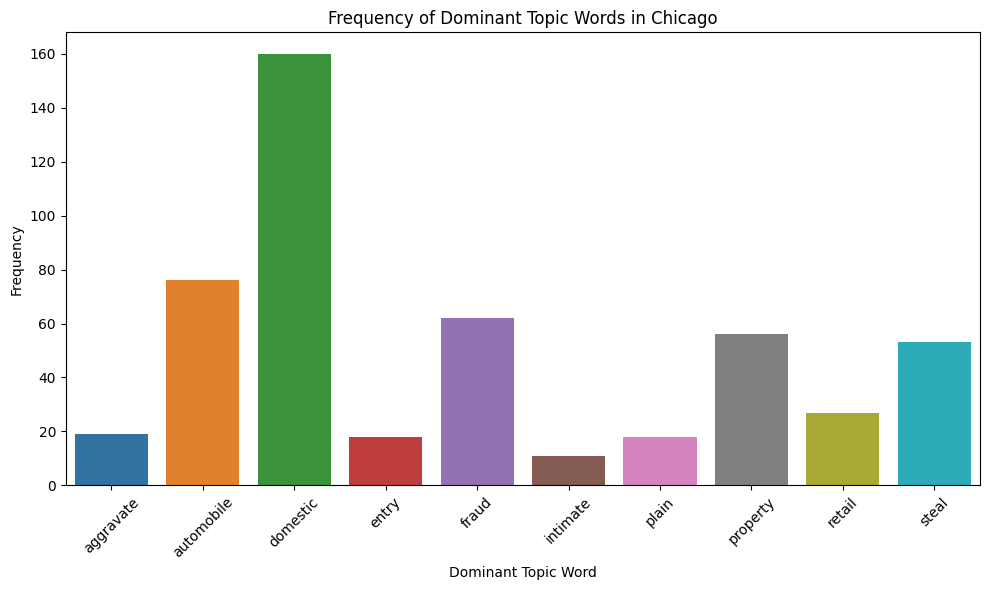

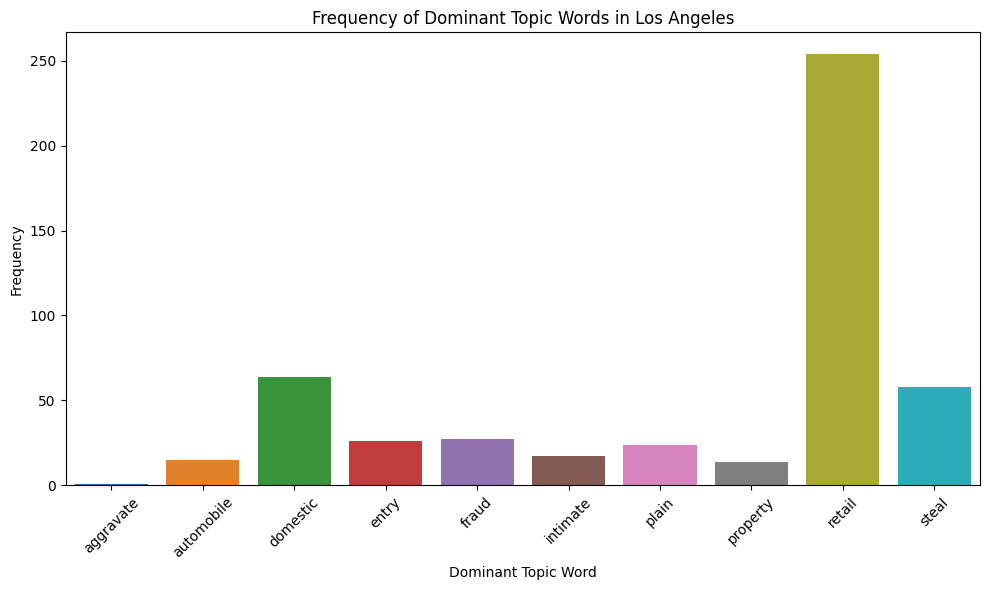

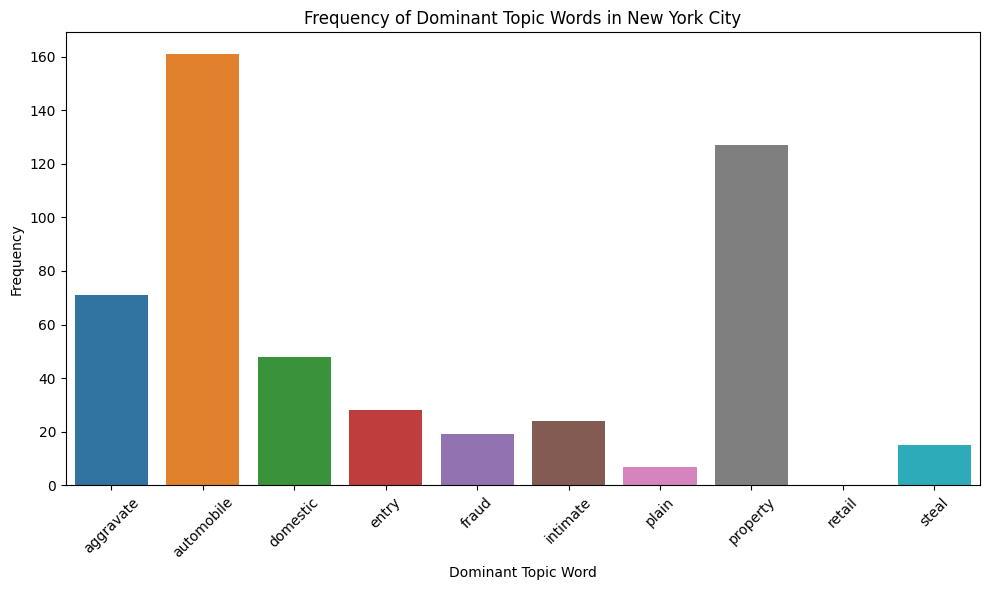

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by city and dominant topic word, and then counting the occurrences
city_topic_word_counts = combined_df.groupby(['City', 'Dominant Topic Word']).size().unstack(fill_value=0)


# Plotting for CHI
plt.figure(figsize=(10, 6))
sns.barplot(x=city_topic_word_counts.columns, y=city_topic_word_counts.loc['CHI'])
plt.title('Frequency of Dominant Topic Words in Chicago')
plt.ylabel('Frequency')
plt.xlabel('Dominant Topic Word')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting for LA
plt.figure(figsize=(10, 6))
sns.barplot(x=city_topic_word_counts.columns, y=city_topic_word_counts.loc['LA'])
plt.title('Frequency of Dominant Topic Words in Los Angeles')
plt.ylabel('Frequency')
plt.xlabel('Dominant Topic Word')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting for NYC
plt.figure(figsize=(10, 6))
sns.barplot(x=city_topic_word_counts.columns, y=city_topic_word_counts.loc['NYC'])
plt.title('Frequency of Dominant Topic Words in New York City')
plt.ylabel('Frequency')
plt.xlabel('Dominant Topic Word')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



This code processes crime data from the DataFrame combined_df, converting the 'Date' column to datetime format and extracting the month to assign seasons (Spring, Summer, Fall, Winter). It then counts the occurrences of crimes by season and visualizes the distribution using a bar plot, where each bar represents the count of crimes in a specific season. The plot is titled 'Crime Distribution by Season for 3 cities' and includes labeled axes, with the x-axis showing the seasons and the y-axis showing the number of crimes.

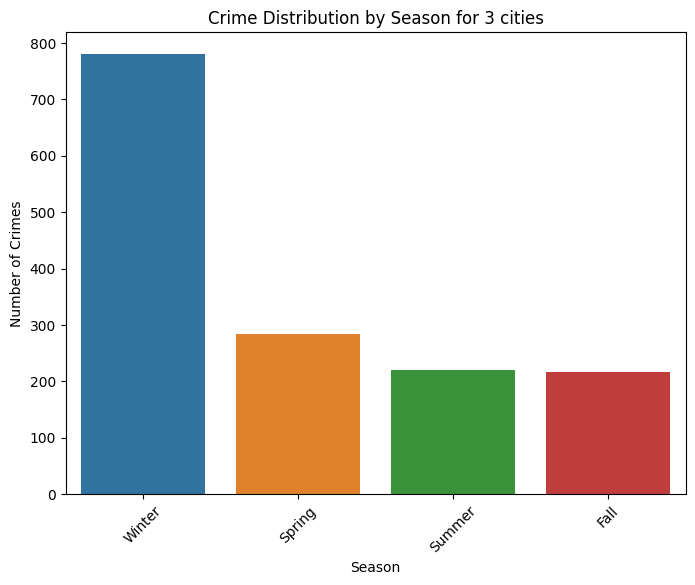

In [20]:
data = combined_df

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract month from the date
data['Month'] = data['Date'].dt.month

# Function to map month to season
def map_season(month):
    if month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    elif month in [9, 10, 11]: return 'Fall'
    else: return 'Winter'

# Map month to season
data['Season'] = data['Month'].apply(map_season)

# Count occurrences of crimes by season
crime_by_season = data['Season'].value_counts()

# Plot crime distribution by season
plt.figure(figsize=(8, 6))
sns.barplot(x=crime_by_season.index, y=crime_by_season.values)
plt.title('Crime Distribution by Season for 3 cities')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

This code snippet analyzes the hourly distribution of crime specifically for New York City (NYC). It filters out data for other cities, creates a new column for the hour of the crime, and then generates a histogram showing the frequency of crimes by hour of the day. Each plot displays the number of crimes for each hour, providing insight into the temporal patterns of criminal activity in NYC.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


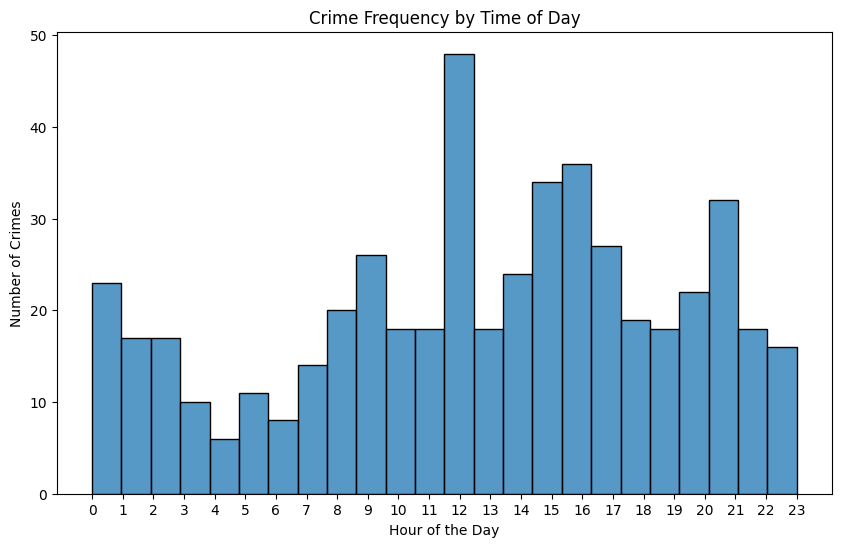

In [21]:
#BY HOUR ONLY FOR NYC

# Filtering out data for cities other than Chicago and Los Angeles
data_without_chicago_la = data[~data['City'].isin(['CHI', 'LA'])]

# Creating a new column 'Hour' to store the hour of the crime
data_without_chicago_la['Hour'] = pd.to_datetime(data_without_chicago_la['Time']).dt.hour


# Plotting the distribution of crime types by time of day for each city (excluding Chicago and Los Angeles)
for city in data_without_chicago_la['City'].unique():
    city_data = data_without_chicago_la[data_without_chicago_la['City'] == city]
    plt.figure(figsize=(10, 6))
    sns.histplot(city_data['Hour'], bins=24, kde=False)
    plt.title(f'Crime Frequency by Time of Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Crimes')
    plt.xticks(range(0, 24))
    plt.show()

Weekly Analysis for all LA and NYC

In [22]:
# Extract day of the week from the date
data['DayOfWeek'] = pd.to_datetime(data['Date']).dt.dayofweek

# Define the mapping of day of the week to its name
days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}



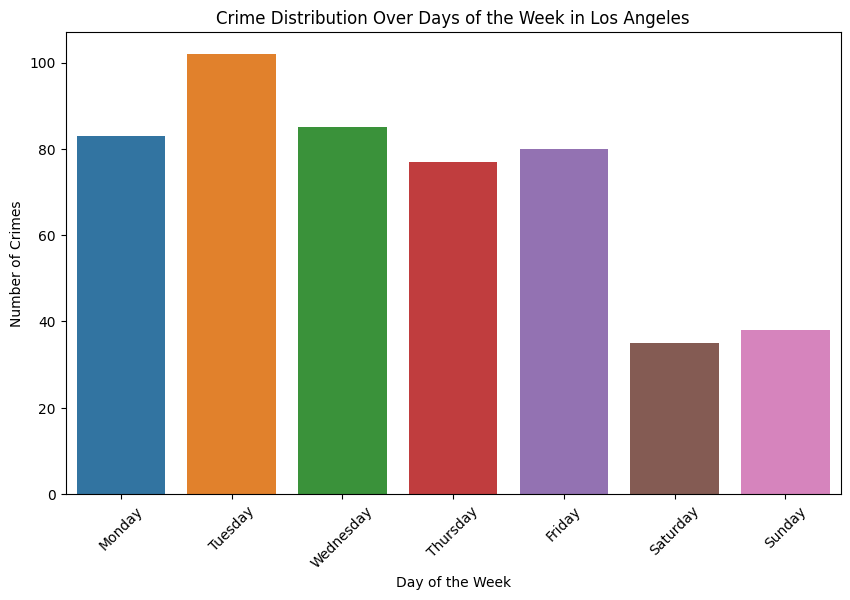

In [23]:
# Filter data for Los Angeles
la_data = data[data['City'] == 'LA']

# Calculate crime distribution over days of the week
crime_by_day_la = la_data.groupby('DayOfWeek').size()
crime_by_day_la = crime_by_day_la.rename(index=days_of_week)

# Plot crime distribution over days of the week for Los Angeles
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_by_day_la.index, y=crime_by_day_la.values, linewidth=1)
plt.title('Crime Distribution Over Days of the Week in Los Angeles')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()



This code generates pie charts to illustrate the distribution of dominant topic words for each city in the dataset. It groups the data by city and topic word, counts the occurrences, and then creates a pie chart for each city. Each slice in the pie chart represents the proportion of occurrences of a specific dominant topic word. The code provides a visual overview of topic word distribution within each city.

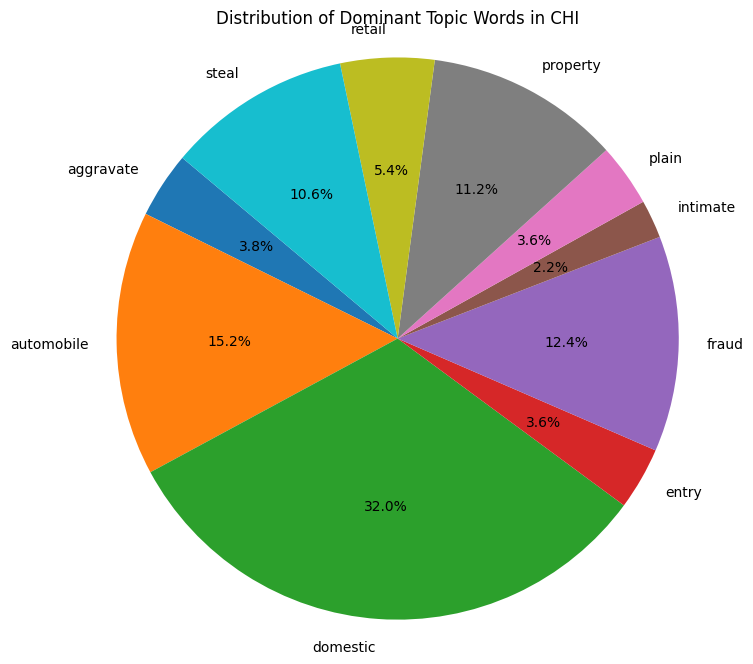

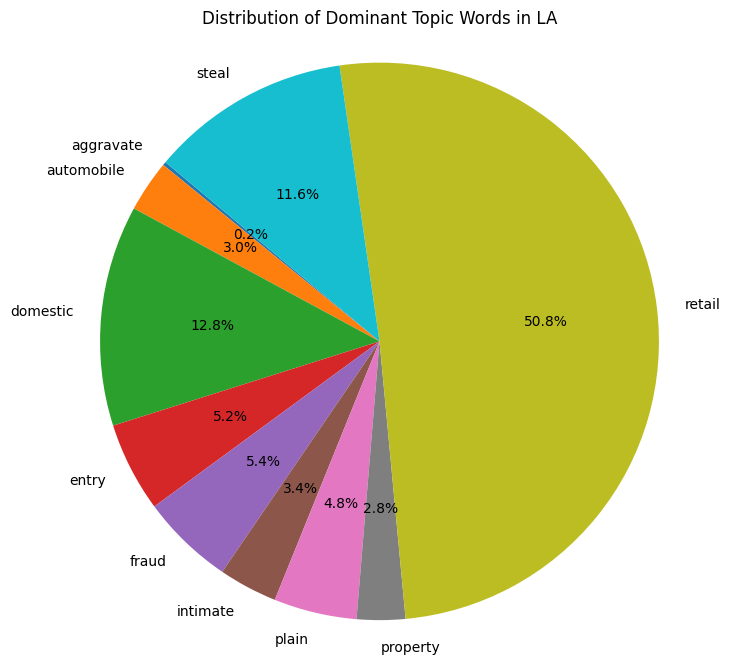

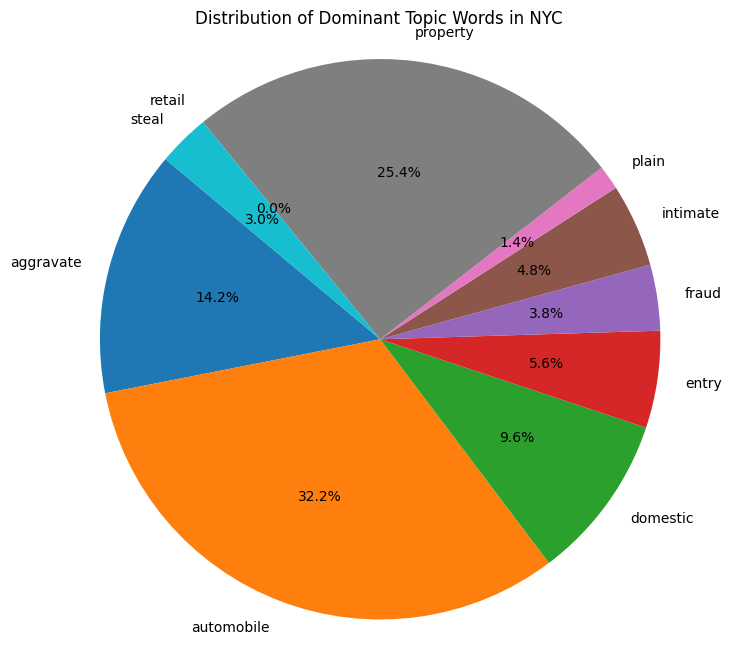

In [24]:
import matplotlib.pyplot as plt

# Grouping the data by city and dominant topic word, and then counting the occurrences
city_topic_word_counts = combined_df.groupby(['City', 'Dominant Topic Word']).size().unstack(fill_value=0)

# Plotting pie charts for each city
for city in city_topic_word_counts.index:
    city_data = city_topic_word_counts.loc[[city]]
    plt.figure(figsize=(8, 8))
    plt.pie(city_data.values.flatten(), labels=city_data.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Dominant Topic Words in {city}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

